# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [25]:
# Check for GPU
!nvidia-smi

Sat Jun 17 16:28:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    30W /  70W |    133MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [26]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(f"Torch version: {torch.__version__}")

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available else 'cpu'
print(f"Device: {device}")

Torch version: 2.0.1+cu118
Device: cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

Answer:
1. self-driving cars
2. security cameras
3.

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Answer:

Overfitting is an undesirable machine learning behavior that occurs when the machine learning model gives accurate predictions for training data but not for new data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

Answer:
1. Early stopping. Early stopping pauses the training phase before the machine learning model learns the noise in the data.
2. Pruning. You might identify several features or parameters that impact the final prediction when you build a model.
3. Regularization.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

Done.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [27]:
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

train_data = datasets.MNIST(root = 'data',
                            train = True,
                            download = True,
                            transform = ToTensor(),
                            target_transform = None)

test_data = datasets.MNIST(root = 'data',
                            train = False,
                            download = True,
                            transform = ToTensor(),
                            target_transform = None)

print(f"The length of the train data: {len(train_data)}")
print(f"The length of the test data: {len(test_data)}")
class_names = train_data.classes
class_names

The length of the train data: 60000
The length of the test data: 10000


['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

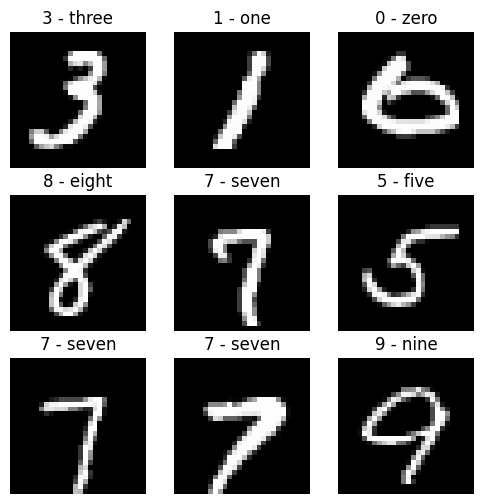

In [28]:
torch.manual_seed(69)

fig = plt.figure(figsize = (6, 6))
rows, cols = 3, 3

for i in range(1, rows*cols + 1):
  random_index = torch.randint(0, len(train_data), size = [1]).item()
  image, label = train_data[random_index]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap = "gray")
  plt.title(class_names[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [29]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

print(f" DataLoaders: {train_dataloader, test_dataloader}")
print(f" Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f" Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

 DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fb8f4bd9c00>, <torch.utils.data.dataloader.DataLoader object at 0x7fb8e9c045e0>)
 Length of train_dataloader: 1875 batches of 32
 Length of test_dataloader: 313 batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [30]:
from torch import nn

class MNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )

    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features = hidden_units * 7 * 7,
                out_features = output_shape)
   )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    return x

model_0 = MNISTModelV0(input_shape = 1,
                        hidden_units = 10,
                        output_shape = len(class_names)).to(device)

model_0

MNISTModelV0(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [31]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download...


In [32]:
from timeit import default_timer as timer
from helper_functions import accuracy_fn
from tqdm.auto import tqdm

def train_time(start: float,
               end: float,
               is_print: bool,
               device: torch.device = None):
  '''Prints and returns difference between start and end time. '''
  total_time = end - start

  if is_print:
    print(f"Training time on {device}: {total_time:.2f} seconds")
  else:
    return total_time


def eval_mode(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = None):
  '''Returns a dictionary containing the results of model predicting on data_loader.'''
  loss, acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):

      X, y = X.to(device), y.to(device)

      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim = 1))

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": float("{:.4f}".format(loss.item())),
          "model_acc (%)": float("{:.2f}".format(acc))}


def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = None):
  """Takes the model through the training loop."""

  train_loss, train_acc = 0, 0

  model.train()

  for batch, (X, y) in enumerate(data_loader):

    X, y = X.to(device), y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y, y_pred.argmax(dim = 1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")


def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device = None):
  """Takes the model through the testing loop."""

  test_loss, test_acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:

      X, y = X.to(device), y.to(device)

      y_pred = model(X)

      test_loss += loss_fn(y_pred, y)
      test_acc += accuracy_fn(y, y_pred.argmax(dim = 1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

  print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")


def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):

  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample
      sample = torch.unsqueeze(sample, dim = 0).to(device)

      # Forward pass
      pred_logit = model(sample)

      # Get prediction probability
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)

      # Pred_prob off GPU for further calculation
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

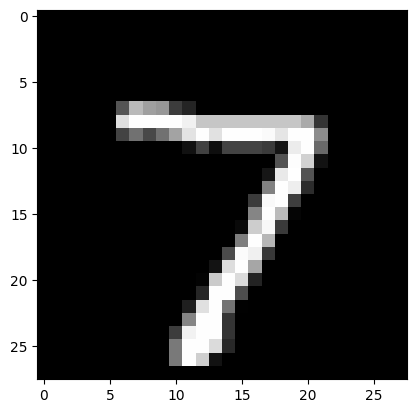

In [33]:
image, label = test_data[0]

plt.imshow(image.squeeze(), cmap = "gray");

In [34]:
image.shape

torch.Size([1, 28, 28])

In [35]:
device

'cuda'

In [36]:
rand_image_tensor = torch.randn(size = (1, 28, 28))
model_0(rand_image_tensor.unsqueeze(dim = 0).to(device))

tensor([[ 0.0099,  0.0400,  0.0320, -0.0905, -0.0205,  0.0165, -0.0175,  0.0171,
          0.0313, -0.0202]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [37]:
# Training and testing model_0

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

train_time_start = timer()

epochs = 5

for epoch in tqdm(range(1, epochs+1)):
  print(f"Epoch: {epoch}\n--------------------------------")

  train_step(model = model_0,
             data_loader = test_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             device = device)

  test_step(model = model_0,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            device = device)

train_time_end = timer()

train_time(start = train_time_start,
           end = train_time_end,
           is_print = True,
           device = device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1
--------------------------------
Train loss: 1.18001 | Train acc: 58.84%
Test loss: 0.26061 | Test acc: 92.47%

Epoch: 2
--------------------------------
Train loss: 0.16398 | Train acc: 94.87%
Test loss: 0.15284 | Test acc: 95.32%

Epoch: 3
--------------------------------
Train loss: 0.10310 | Train acc: 96.70%
Test loss: 0.11819 | Test acc: 96.11%

Epoch: 4
--------------------------------
Train loss: 0.07490 | Train acc: 97.57%
Test loss: 0.09110 | Test acc: 96.91%

Epoch: 5
--------------------------------
Train loss: 0.05976 | Train acc: 98.14%
Test loss: 0.08295 | Test acc: 97.14%

Training time on cuda: 18.23 seconds


In [38]:
eval_mode(model = model_0,
          data_loader = test_dataloader,
          loss_fn = loss_fn,
          accuracy_fn = accuracy_fn,
          device = device)

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'MNISTModelV0', 'model_loss': 0.083, 'model_acc (%)': 97.14}

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

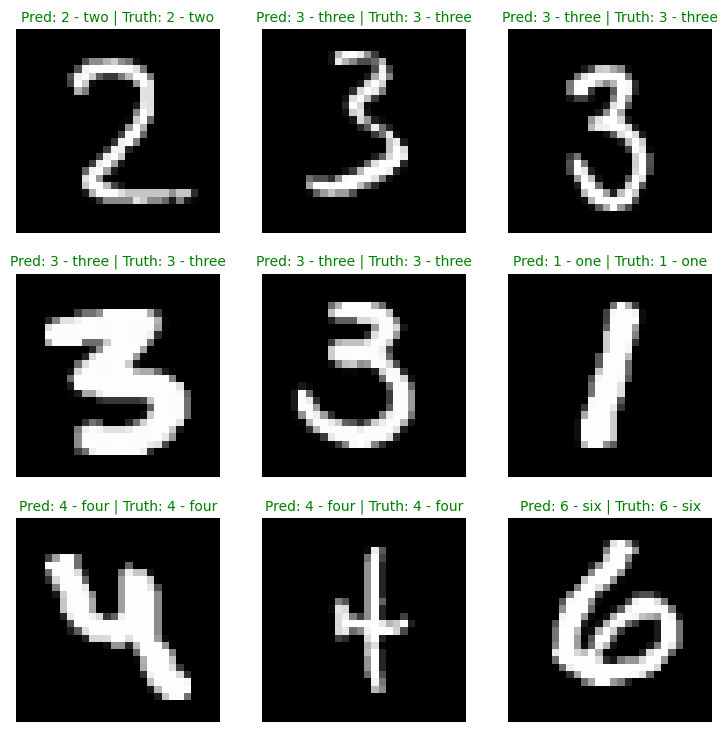

In [39]:
import random

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k = 9):
  test_samples.append(sample)
  test_labels.append(label)

# plt.imshow(test_samples[0].squeeze(), cmap = "gray");
# plt.title(class_names[test_labels[0]]);

# Make predictions

pred_probs = make_predictions(model = model_0,
                              data = test_samples)

pred_classes = pred_probs.argmax(dim = 1)

# Plot predictions
plt.figure(figsize = (9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):

  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap = "gray")

  # Find the prediction
  pred_label = class_names[pred_classes[i]]

  # Get the truth label
  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change color of title test
  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c = "g")
  else:
    plt.title(title_text, fontsize = 10, c = "r")

  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [40]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions
y_preds = []
model_0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = "Making predictions..."):
    X, y = X.to(device), y.to(device)

    y_logit = model_0(X)

    y_pred = torch.softmax(y_logit.squeeze(), dim = 0).argmax(dim = 1)

    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor, y_pred_tensor.shape

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

(tensor([7, 2, 1,  ..., 4, 5, 6]), torch.Size([10000]))

In [41]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0
mlxtend version: 0.22.0


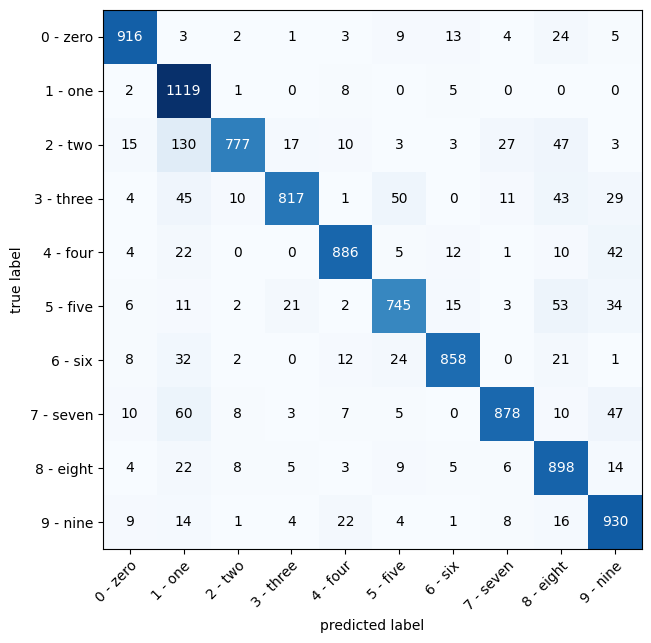

In [42]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes = len(class_names), task = 'multiclass')
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(),
                                class_names = class_names,
                                figsize = (10, 7))

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [43]:
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

train_data = datasets.FashionMNIST(root = 'data',
                                   train = True,
                                   download = True,
                                   transform = ToTensor(),
                                   target_transform = None)

test_data = datasets.FashionMNIST(root = 'data',
                                  train = False,
                                  download = True,
                                  transform = ToTensor(),
                                  target_transform = None)

print(f"The length of the train data: {len(train_data)}")
print(f"The length of the test data: {len(test_data)}")
class_names = train_data.classes
class_names

100%|██████████| 26421880/26421880 [00:03<00:00, 8097081.70it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 138487.58it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2542941.08it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18345180.11it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

The length of the train data: 60000
The length of the test data: 10000


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

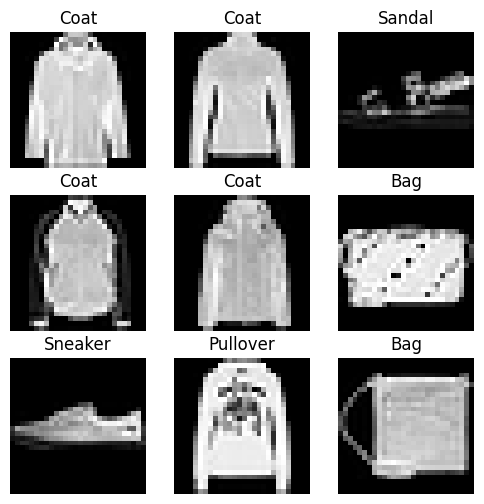

In [44]:
torch.manual_seed(69)

fig = plt.figure(figsize = (6, 6))
rows, cols = 3, 3

for i in range(1, rows*cols + 1):
  random_index = torch.randint(0, len(train_data), size = [1]).item()
  image, label = train_data[random_index]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap = "gray")
  plt.title(class_names[label])
  plt.axis(False)

In [45]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False)

print(f" DataLoaders: {train_dataloader, test_dataloader}")
print(f" Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f" Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

 DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7fb8f6cbfd00>, <torch.utils.data.dataloader.DataLoader object at 0x7fb875dface0>)
 Length of train_dataloader: 1875 batches of 32
 Length of test_dataloader: 313 batches of 32


In [47]:
# Import tqdm.auto
from tqdm.auto import tqdm

# 1. Make predictions
y_preds = []
model_0.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = "Making predictions..."):
    X, y = X.to(device), y.to(device)

    y_logit = model_0(X)

    y_pred = torch.softmax(y_logit.squeeze(), dim = 0).argmax(dim = 1)

    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor, y_pred_tensor.shape

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

(tensor([2, 0, 7,  ..., 0, 8, 4]), torch.Size([10000]))

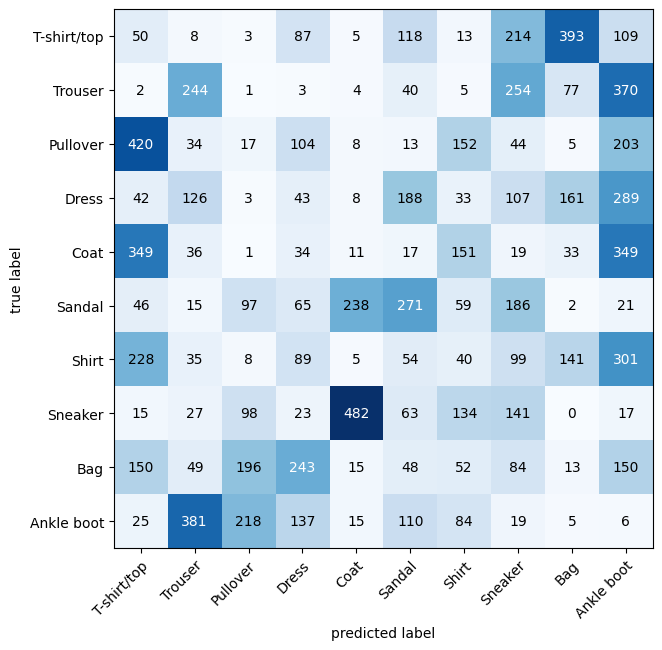

In [49]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes = len(class_names), task = 'multiclass')
confmat_tensor = confmat(preds = y_pred_tensor,
                         target = test_data.targets)

# Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(),
                                class_names = class_names,
                                figsize = (10, 7))

## 14. Save the model

In [50]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = "03_pytorch_computer_vision_exercises_model_0.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(),
           f = MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_exercises_model_0.pth
